 <h1><center> TP : régréssion linéaire - Données contaminées par un robot  <h1><center>

Nous travaillons sur la base de données diabetes de python. La base initiale comporte 442 patients et 10 covariables. La variable Y à expliquer est un score correspondant à l’évolution de la maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en y ajoutant 200 variables explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti notre jeu de données, il a volontairement mélangé les variables entre elle de façon aléatoire. Bien entendu le robot a ensuite pris soin d’effacer toute trace de son acte crapuleux si bien que nous ne connaissons pas les variables pertinentes. La nouvelle base de données comporte 442 patients et 210 covariables, notés X. Saurez-vous déjouer les plans de ce robot farceur et retrouver les variables pertinentes ?

Nb : Dans notre jeux de données , il y a 210 variables  , on les notera  [var1 , var2 , var3 .....var210]

## Question 1 ##
Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/ portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer. Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives et le nombre d’observations.

In [5]:
############ suppression des warnings ###############

import warnings
warnings.filterwarnings('ignore')


########### on fixe le seeed #####################
import random

random.seed(12345)

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


##########specification du nombre de colonnes & lecture des données ###########
listcov=list(map(lambda x:"var"+str(x),list(range(1,211))))
listcol=list(map(lambda x:"var"+str(x),list(range(1,211))))
listcol.append("y")

url="https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv"
df_init=pd.read_csv(url,sep=",",names=listcol)
n_obs=df_init.shape[0]
nvar=df_init.shape[1]
df_init.head()
print("Le nombre d'observations est %s" %n_obs)
print("Le nombre de variables est %s" %(nvar-1))
print("Le nombre de variables à expliquer est %s" %(1))

Le nombre d'observations est 442
Le nombre de variables est 210
Le nombre de variables à expliquer est 1


## Question 2 
Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des autres). Commenter les graphiques obtenus.

Pour vérifier si la variable est centrée ou non , on crée une fonction checkcenter qui vérifie si une variable reçue comme input a une moyenne très faible ( inférieur à 10^-7 ) et un écart-type proche de 1 ( à 10^-1 près ) . On validera ensuite les résultats graphiquement.

Les variables explicatives sont centrées et normalisées ? True
La moyenne de y = 152.1335 et son écart-type  = 77.0930
La variable y est centrée ? False

########### vérification graphique #########


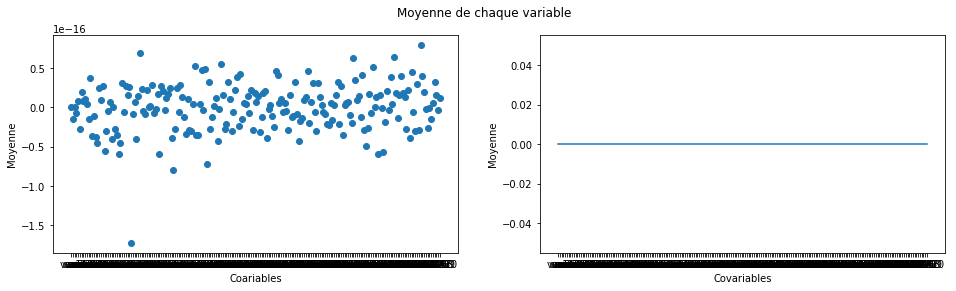

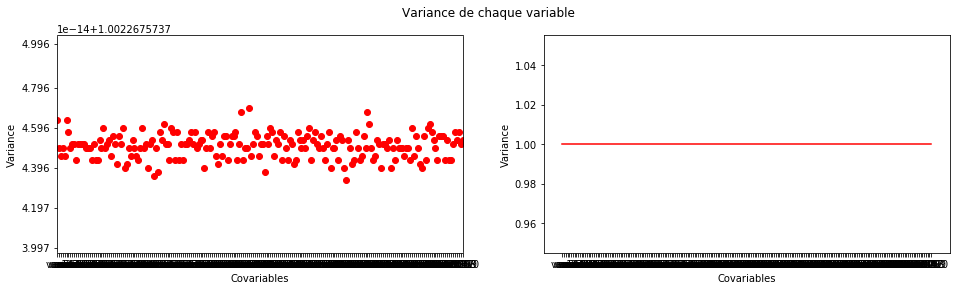

In [7]:
%matplotlib inline


################## la fonction checkcenter qui vérife la moyenne et l'écart-type ###########
def checkcenter(x):
    return   abs(x.mean()) < 0.0000001 and (x.std() < 1.01 and x.std()> 0.99)

# litevariable contient les variables vax1 ==> var210
listevariable=list(map(lambda x:"var"+str(x),list(range(1,211))))


nbrecenteredvar=list(df_init[listevariable].apply(checkcenter)).count(True) # nombre de variable centrées = 0
print("Les variables explicatives sont centrées et normalisées ? %s" %(nbrecenteredvar==len(listevariable)))
print ( "La moyenne de y = %.4f et son écart-type  = %.4f"%(df_init['y'].mean(),df_init['y'].std() ))
print("La variable y est centrée ? %s" %checkcenter(df_init['y']))



################################## vérification gaphique ######################################
print ("\n########### vérification graphique #########")
# On trace les graphiques de la moyenne des variables
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].plot(df_init[listevariable].mean(),'o')
axs[0].set_xlabel('Coariables')
axs[0].set_ylabel('Moyenne')
axs[1].plot(df_init[listevariable].mean().round(2))
axs[1].set_xlabel('Covariables')
axs[1].set_ylabel('Moyenne')
fig.suptitle("Moyenne de chaque variable")
plt.show()

# On trace les graphique de la variance des variables
fig2, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].plot(df_init[listevariable].var(),'o',color='red')
axs[0].margins(0,1)
axs[0].set_xlabel('Covariables')
axs[0].set_ylabel('Variance')
axs[1].plot(df_init[listevariable].var().round(),color='red')
axs[1].set_xlabel('Covariables')
axs[1].set_ylabel('Variance')
fig2.suptitle("Variance de chaque variable")
plt.show()


Les valeurs des moyennes de chaque variable est de l'ordre de 1e-16 ce qui est suffisant pour conclure que les variables sont centrées.
On vérifie aussi que la variance des variables explicatived est très proche de 1 avec des fluctuations de l'ordre de 1e-14. On peut en conclure que les variables sont normalisées.
La variable à expliquer Y n'est pas standardisée car sa moyenne est de 152 et son écart-type est de 77.


Les colonnes sélectionnées aléatoirement : ['var57', 'var74', 'var201', 'var201']


ValueError: x and y must be the same size

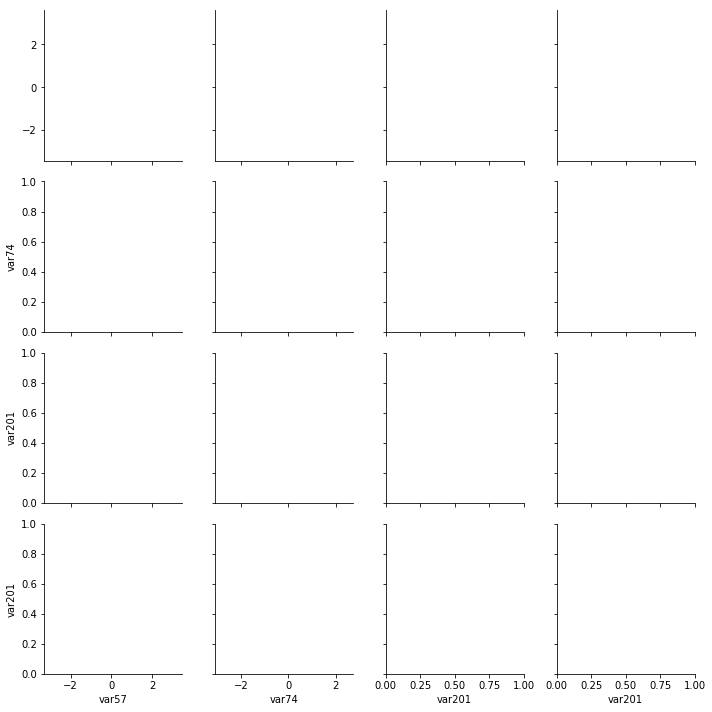

In [4]:
################# Choix de 4 variables (colonnes) aléatoirement parmi toutes les variables X###############

%matplotlib inline

# Choix de 4 variables (colonnes) aléatoirement parmi toutes les variables X
randcol = list(map(lambda x:"var"+str(x) ,np.random.randint(0,210,4)))
# On ajoute la variable Y
print("Les colonnes sélectionnées aléatoirement : {}".format(randcol))

##### scatter plot ###
g = sns.PairGrid(df_init.filter(items=randcol))  # on prend 4 variables 

g.map(plt.scatter, color='white')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.subplots_adjust(left=0.1, right=0.9)
plt.show()

pp = sns.pairplot(data=df_init,
                  y_vars=['y'],
                  x_vars=randcol)
plt.figure(figsize=(20,14)) 
plt.show()




D'après les graphes diagonaux de la figure 2 , on conclut que les variables choisies ont des distributions gaussiennes. 
Par contre , on ne remarque aucune relation particulière entre elles . 
La figure 3 présente un scatter plot de la variable y en fonction des 4 variables choisies . On constate qu'il n'y a pas de relation linéare entre le target y et ces variables.


## Question 3

Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle X train ,
un pour tester le modèle X test . On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles
de chacun des 2 échantillons. On notera que le nouvel échantillon de covariables X train n’est pas
normalizé. Dans la suite, on fera donc bien attention à inclure l’intercept dans nos régression.

In [5]:
##### splitter les données
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_init, test_size=0.2)
print("L'échantillon train est de taille : %s x %s" %(train.shape[0],train.shape[1]))
print("L'échantillon test est de taille : %s x %s" %(test.shape[0],test.shape[1]))

L'échantillon train est de taille : 353 x 211
L'échantillon test est de taille : 89 x 211


## Question 4 : ACP
Donner la matrice de covariance calculée sur X train . Tracer le graphe de la décroissance des valeurs
propres de la matrice de corvariance. Expliquer pourquoi il est légitime de ne garder que les premières
variables de l’ACP. On gardera 60 variables dans la suite.

la matrice de covariance :
          0         1         2         3         4         5         6    \
0    0.978254 -0.153586 -0.049630 -0.307254  0.152463  0.169697 -0.084163   
1   -0.153586  1.054400  0.081765 -0.225261 -0.106642 -0.138416  0.189818   
2   -0.049630  0.081765  0.982228 -0.163007  0.149536 -0.080589 -0.082505   
3   -0.307254 -0.225261 -0.163007  1.021308  0.011030 -0.075492  0.120987   
4    0.152463 -0.106642  0.149536  0.011030  1.016698 -0.016971 -0.000757   
5    0.169697 -0.138416 -0.080589 -0.075492 -0.016971  1.029357  0.121858   
6   -0.084163  0.189818 -0.082505  0.120987 -0.000757  0.121858  1.028706   
7   -0.161435 -0.108098  0.046751 -0.084788  0.190094 -0.046205  0.117264   
8    0.011298  0.092033 -0.019252  0.065117  0.004036 -0.115601  0.093484   
9   -0.100624 -0.125038 -0.143430  0.037242  0.139498  0.044512  0.183477   
10   0.060522  0.064733 -0.005184  0.152521  0.343624  0.251402  0.069317   
11   0.053883  0.132733 -0.033113 -0.120084 -0.11

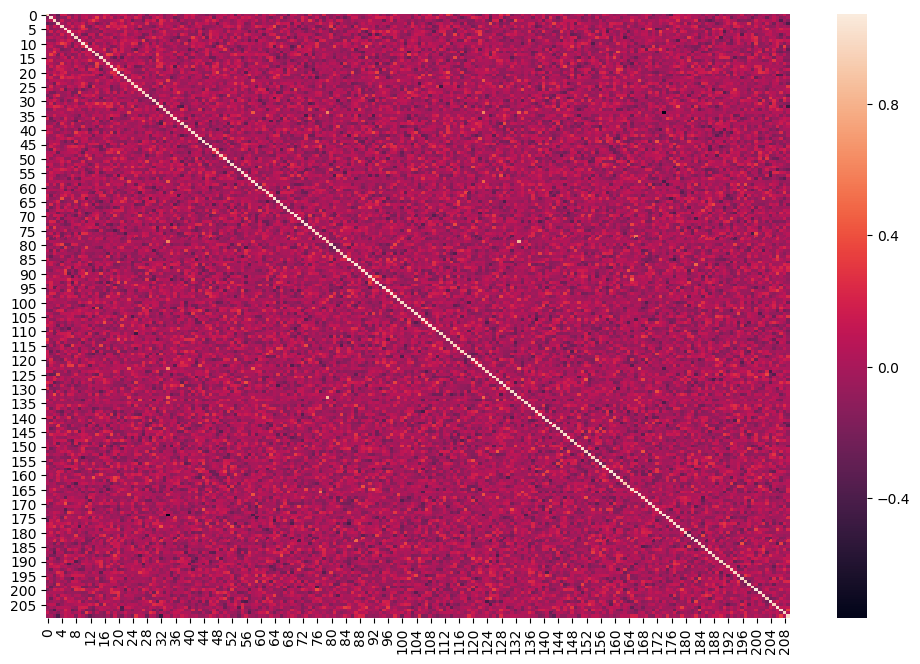

In [31]:
%matplotlib inline


####################       matrice de covariance      #####################

X_std= train.ix[:,0:210].values
y = train.ix[:,210].values
cov_mat = np.cov(X_std.T) 
print("la matrice de covariance :\n%s" %pd.DataFrame(cov_mat))


############### Graphe illustrant l'intensité de la covariance #########

plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(cov_mat)
plt.show()



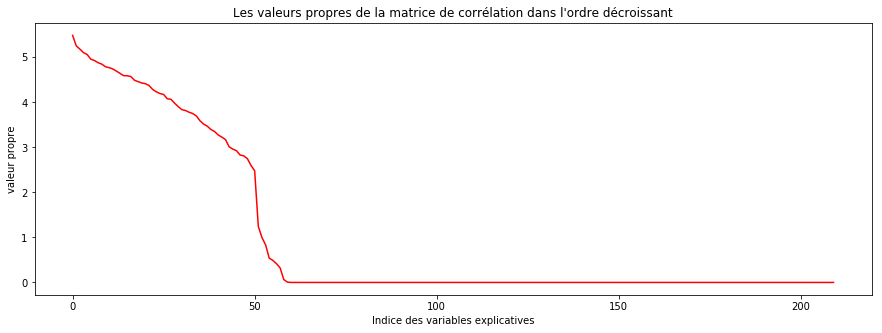

In [7]:
###############################  calcul des vecteurs et des valeurs propres #################################
%matplotlib notebook 
%matplotlib inline

eig_vals, eig_vecs=np.linalg.eigh(cov_mat, UPLO='L')

##################  sort eigenvalues and keep the eigen vectors   #########
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

eig_vals_sorted = [ eig_pairs[i][0] for i in range(len(eig_vals))]

plt.figure(figsize=(15,5)) 

plt.title("Les valeurs propres de la matrice de corrélation dans l'ordre décroissant")
plt.ylabel('valeur propre')
plt.xlabel('Indice des variables explicatives')
plt.plot(eig_vals_sorted,color='red')
plt.show()

D'après le graphe  , les valeur propres sont nulles à partir du l'indice 60.Ceci veut dire qu'il n'y a que 60 variables qui ne sont pas des combinaisons linéaires des autres.Au-delà de cet indice , les variables n'apportent pas donc d'information supplémentaire pour expliquer la variance du modèle. De ce fait , il est légitime de garder que les 60 premières variables pour l'ACP.

## Question 5 :  PCA before OLS
Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui consiste à appliquer OLS avec Y et XtrainV(1:60), où V(1:60) contient les vecteurs propres (associés aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de même avec la méthode des moindres carrés classique.

In [8]:
##### on garde les 60 premières variables ######

max_features=60
eig_vecs_sorted = [ eig_pairs[i][1] for i in range(len(eig_vals[0:max_features]))]

### on recontruit X avec les 60 meilleurs vecteurs
X_pca = pd.DataFrame(X_std.dot(np.transpose(eig_vecs_sorted))) ### on l'utiliera après
df_pca=pd.DataFrame(X_std.dot(np.transpose(eig_vecs_sorted))) ##on fait la projection,on transforme en dataframe

df_pca['y']=train['y'].values ## ajout du target
listcol=list(map(lambda x:"var"+str(x),list(range(1,61)))) ## renommage des colonnes
listcol.append("y")
df_pca.columns=listcol

df_pca.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var52,var53,var54,var55,var56,var57,var58,var59,var60,y
0,-1.648039,-0.446519,2.568845,-1.871970,-0.316260,-2.445555,1.663400,-1.956773,-0.494922,-0.292686,...,3.176189,1.099141,0.645230,-0.468729,-0.683210,0.547371,-0.087664,0.320722,-0.059879,283.0
1,4.562388,2.263730,-1.610325,0.317283,1.639008,-0.722549,-2.944941,1.662526,-4.414232,-0.351548,...,0.063145,-0.671937,1.765200,0.568989,0.296150,-0.920394,0.205652,-0.170264,-0.013102,279.0
2,0.005103,0.754929,1.725141,1.014162,-3.122414,2.681836,-0.466717,0.852211,-0.969122,-2.634724,...,-0.141563,-0.583547,-1.626754,-0.226177,-0.628794,-0.823201,0.070288,-0.183041,-0.106332,80.0
3,3.017521,0.347196,-0.204053,-1.378159,5.261505,0.828345,-1.542263,-3.151271,0.936997,1.250299,...,-0.174971,-0.206044,-1.250081,0.120109,-0.415740,-0.457272,-0.004321,0.284299,0.019284,97.0
4,-3.137886,1.009826,-3.745213,-0.338994,0.509814,-0.104559,0.453524,-0.089962,-3.475272,0.530953,...,-0.120031,-0.464185,1.147424,0.464537,0.417828,0.865134,-1.008844,-0.026943,0.084057,276.0


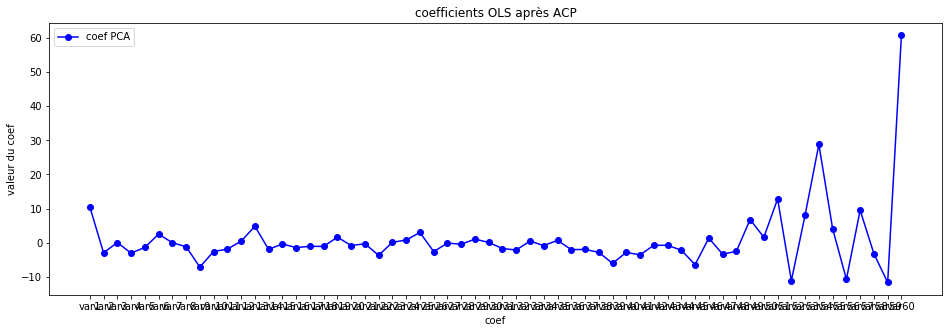

In [9]:
%matplotlib notebook 
%matplotlib inline 
from sklearn import linear_model

######### estimation OLS après ACP###########

y = train["y"]
X = X_pca
skl_lm = linear_model.LinearRegression()
skl_lm.fit(X, y)
listcoef=skl_lm.coef_
intercept_pca=skl_lm.intercept_
plt.figure(figsize=(16,5))
plt.plot(list(map(lambda x:"var"+str(x),list(range(1,61)))),listcoef,"-o",color='blue',label="coef PCA")
plt.title('coefficients OLS après ACP')
plt.xlabel('coef')
plt.ylabel('valeur du coef')
plt.legend(loc='upper left')
plt.show()

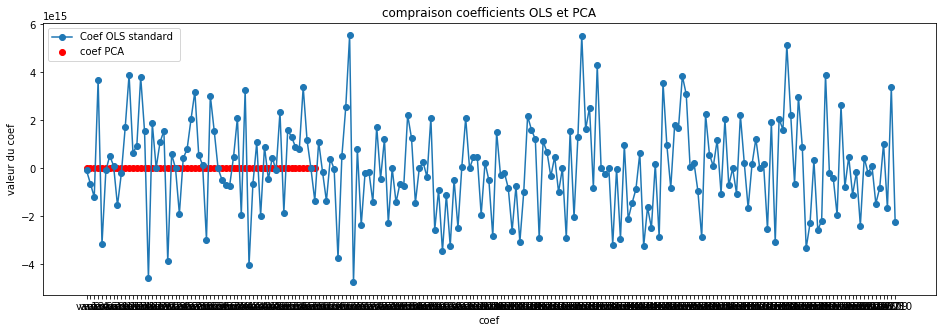

In [10]:
%matplotlib notebook 
%matplotlib inline 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import matplotlib.pyplot as plt



########"" esimation OLS classique ###########
X_OLS=train[list(map(lambda x:"var"+str(x),list(range(1,211))))]
Y_OLS=train["y"]
X_OLS
skl_lm_total = linear_model.LinearRegression(fit_intercept=True)
skl_lm_total.fit(X_OLS, Y_OLS)
listcoef_total=skl_lm_total.coef_
intercept_sanspca=skl_lm_total.intercept_


# On trace le graphique des coefficients
plt.figure(figsize=(16,5))
plt.plot(list(map(lambda x:"var"+str(x),list(range(1,211)))),listcoef_total,"-o",label="Coef OLS standard ")
plt.scatter(list(map(lambda x:"var"+str(x),list(range(1,61)))),listcoef,color='red',label="coef PCA")
plt.title('compraison coefficients OLS et PCA')
plt.xlabel('coef')
plt.ylabel('valeur du coef')
plt.legend(loc='upper left')
plt.show()


On remarque que les coefficients de la regression classique varient enormément et il y a des valeurs abérrantes qui atteignent e15 , cela est attendu vu que la majorité des variables ne sont que du bruit aléatoire.

## Question 6
Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux? Commenter. Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y sur le train.

In [11]:

print("intercept avec pca : " + str(intercept_pca))
print("intercept sans pca : " + str(intercept_sanspca))  ## ça doit etre egal à y_bar ,il y a une faute
print("la valeur moyenne de y :"+str(train['y'].mean()))

intercept avec pca : 150.78982877531428
intercept sans pca : 151.67399964589234
la valeur moyenne de y :150.25212464589234


Les valeurs de l'intercept de la regression avec/sans PCA sont très proches mais elles sont différentes car on ne travaille pas sur les memes variables explicatives . On remarque également que l'intercept pour la méthode de PCA avant OLS est plus proche de la moyenne des y.

In [12]:

################## centrage des variables et recalcul de l'intercept ###############
from sklearn.preprocessing import StandardScaler
X_pca_center = StandardScaler().fit_transform(X_pca)

skl_lm_center = linear_model.LinearRegression(fit_intercept=True)
skl_lm_center.fit(X_pca_center, train['y'])
print("Le nouveau intercept est %.4f" % skl_lm_center.intercept_)


Le nouveau intercept est 150.2521


Après centrage , l'intercept doit être égal à la moyenne de la variable à expliquer . On vérifie bien le résultat.

## Question 7 
Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

In [13]:

#projection des données de test sur les vecteurs propres de PCA
X_test=test.ix[:,0:210].values
X_pca_test = X_test.dot(np.transpose(eig_vecs_sorted))
X_pca_test=pd.DataFrame(X_pca_test)
y_predict_pca = skl_lm.predict(X_pca_test)
y_predict_sanspca = skl_lm_total.predict(X_test)

coef_determination_ols_pca=skl_lm.score(X_pca_test,test['y']) ## calcul du coef de determination pca before ols
coef_determination_ols_classique=skl_lm_total.score(X_test,test['y'])## calcul du coef de determination ols classique

print("Coefficient de détermination de la regression avec ACP : %.4f "%skl_lm.score(X_pca_test,test['y']))
print("Coefficient de détermination de la regression classique :  %.4f "%skl_lm_total.score(X_test,test['y']))


r_pca=test['y']-y_predict_pca 
r_sanspca=test['y']-y_predict_sanspca 

    #ridgereg.score(test[listevariable],test['y'])
risk_prediction_pca= np.dot(r_pca,np.transpose(r_pca))/len(r_pca)
risk_prediction_sanspca= np.dot(r_sanspca,np.transpose(r_sanspca))/len(r_sanspca)
print("Risque de prédiction de la régression après ACP : %.4f"%risk_prediction_pca)
print("Risque de prédiction de la régression classique : %.4f"%risk_prediction_sanspca)


Coefficient de détermination de la regression avec ACP : 0.3634 
Coefficient de détermination de la regression classique :  0.2958 
Risque de prédiction de la régression après ACP : 4512.4039
Risque de prédiction de la régression classique : 4990.9094


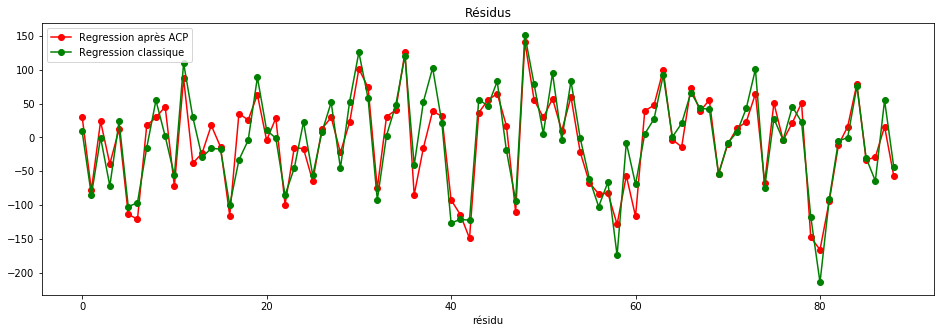

In [14]:
#########" traçage des résidus ##############
%matplotlib notebook 
%matplotlib inline 
plt.figure(figsize=(16,5))
plt.title('Résidus')
plt.xlabel('résidu')
plt.plot(list(range(0,len(y_predict_sanspca))),y_predict_pca-test['y'],"-o", color='red',label="Regression après ACP") # recall that x is the Years
plt.plot(list(range(0,len(y_predict_sanspca))), y_predict_sanspca-test['y'], "-o",color='green',label="Regression classique") # recall that x is the Years

plt.legend(loc='upper left')
plt.show()

/home/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


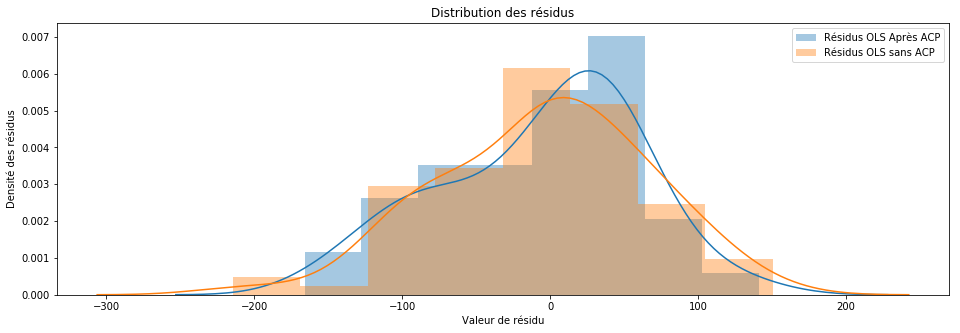

In [15]:
%matplotlib inline 
######################## distribution des résidus ##################
import seaborn as sns
plt.figure(figsize=(16,5))
sns.distplot(y_predict_pca-test['y'],label="Résidus OLS Après ACP")
sns.distplot(y_predict_sanspca-test['y'],label="Résidus OLS sans ACP")
plt.title("Distribution des résidus")
plt.xlabel('Valeur de résidu')
plt.ylabel('Densité des résidus')
plt.legend()
plt.show()

Comme attendu, on constate que le risque de prédiction avec une régression OLS classique est plus élevé que l'OLS avec l'ACP .

## Question 8

Appliquer la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables. Afficher l’ordre de séléction des variables.

In [16]:
from scipy.stats import t  # determination des seuil de student et la valeur critique

def calcul_signif(beta,sd,degreeliberte): ## fonction qui calcule lla t-stat et la p-val
    t_stat_beta=beta/sd  
    p_val_beta= (1 - t.cdf(abs(t_stat_beta),degreeliberte)) * 2
    return [abs(t_stat_beta),p_val_beta]



def forward_selection(X, Y, stop_criterion=False, threshold=0.1):
    """Méthode de forward variable sélection en utilisant la loi de student pour calculer les stat de test
    X: array des covariables de l'échantillon training
    Y: array formée par la variable à expliquer
    """
    n_obs = X.shape[0] # Le nombre d'observation surX
    select_var = []  # tablau des variables selectionnées
    select_p_valeur = []  #tableau des p-value sélectionnées à chaque étape
    select_t_stat = [] # tableau des T-stat selectionnées à chaque étape
    X = np.append(np.ones((len(X),1)), X, axis=1)  ##on ajoute l'intercept
    i = 0 # un copteur pour mettre à jour les tables
    test_t = np.zeros((X.shape[1],X.shape[1])) # tstat : tableau des T-stat calculées à chaque étape
    pval = np.zeros((X.shape[1],X.shape[1]))#  pval : tableau des p-value calculées à chaque étape
    
    # à chaque étape on enlèvera l'élément de la liste correspondant à
    # l'indice de la variable sélectionnée
    while len(select_var) <= X.shape[1]-1:
        p_valeur = []
        t_statistique = []
        residual = []

        for j in range(X.shape[1]):
            if j not in select_var: # si la var j n'a pas été selectionné avant , on regresse
                
                # On effectue la régression de la variable en cours sur les résidus
                Xj = X[:, j]
                thetaj = 1 / (Xj.T @ Xj) * Xj.T @ Y
                Y_pred = Xj * thetaj
                
                # On calcule sigma2, la statistique de test de nullité et la p-value de la variable en cours    
                sigma2j = (Y - Y_pred).T @ (Y - Y_pred) / (n_obs - 1)
                sigma_thetaj = np.sqrt(sigma2j * 1 / (Xj.T @ Xj))
                t_statistiquej,p_valeurj= calcul_signif(thetaj ,sigma_thetaj,n_obs-1)

                p_valeur.append(p_valeurj)
                t_statistique.append(t_statistiquej)    
                
                # On calule les résidus en retranchant ceux de l'étape précédente
                residual.append(Y - Y_pred)

            else:
                p_valeur.append(1.1)
                residual.append(0)
                t_statistique.append(0)

        test_t[:,i] = t_statistique                
        pval[:,i] = p_valeur
        
        
        # On enregistre la meilleure variable, celle qui maximise la Statistique
        imax = np.argmax(t_statistique)
        Y = residual[imax]
        select_var.append(imax)
        select_p_valeur.append(p_valeur[imax])
        select_t_stat.append(t_statistique[imax])

        if stop_criterion == True and p_valeur[imax] > threshold:
            return np.transpose(select_var[1:-1]) - 1, np.transpose(select_p_valeur)[:-1],test_t
            break
                
        i+=1

    return np.transpose(select_var[1:]) - 1, np.transpose(select_p_valeur), test_t

In [17]:

######### affichage des variables #########
listevariable=list(map(lambda x:"var"+str(x),list(range(1,211))))
######## attention , on commence de la variable 1 et non de 0 #######
select_variables, select_p_val, test_statistics = forward_selection(np.array(train[listevariable]), np.array(train['y']), False)
print(f"les variables selectionnées après la forward selection (sans intercept) sont :\n%s" %["var"+str(i+1) for i in select_variables])

les variables selectionnées après la forward selection (sans intercept) sont :
['var59', 'var124', 'var134', 'var14', 'var81', 'var168', 'var130', 'var46', 'var48', 'var177', 'var136', 'var156', 'var42', 'var35', 'var209', 'var76', 'var163', 'var125', 'var112', 'var117', 'var184', 'var80', 'var201', 'var206', 'var100', 'var57', 'var141', 'var175', 'var24', 'var43', 'var171', 'var79', 'var101', 'var104', 'var203', 'var37', 'var4', 'var27', 'var158', 'var198', 'var69', 'var165', 'var182', 'var67', 'var91', 'var2', 'var13', 'var107', 'var21', 'var23', 'var106', 'var34', 'var202', 'var51', 'var56', 'var26', 'var200', 'var99', 'var55', 'var58', 'var90', 'var85', 'var86', 'var151', 'var113', 'var103', 'var87', 'var142', 'var193', 'var22', 'var135', 'var189', 'var110', 'var92', 'var187', 'var173', 'var191', 'var39', 'var123', 'var32', 'var36', 'var147', 'var137', 'var72', 'var5', 'var174', 'var31', 'var60', 'var179', 'var88', 'var139', 'var62', 'var1', 'var84', 'var45', 'var98', 'var17', 'var

## Question 9
Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant (i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii) le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0.1. Enfin on donnera la liste des variables sélectionnées.

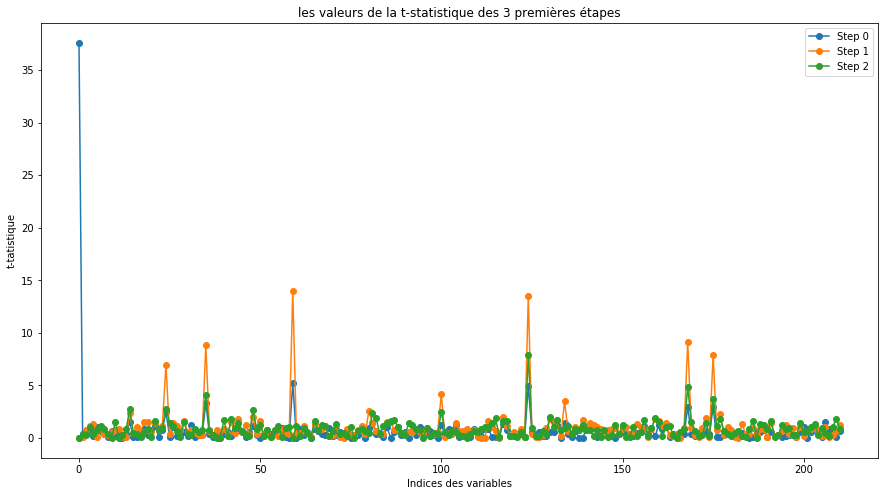

In [18]:

#### on utilise la meme procedure mais avec un critère d'arret (stop_criterion=False)

listevariable=list(map(lambda x:"var"+str(x),list(range(1,211))))
select_variables_stop, select_p_val_stop ,tstat_stop= forward_selection(np.array(train[listevariable]), np.array(train['y']), True)


### affichage des t-statistiques ####
%matplotlib inline

plt.figure(figsize=(15,8)) #10 unites dans un sens, 4 dans l'autre
for k in range(3): 
    s_label = "Step %s" % k
    plt.plot(tstat_stop [:,k], '-o',label = s_label)
plt.legend(loc=1)
plt.title("les valeurs de la t-statistique des 3 premières étapes")
plt.xlabel("Indices des variables")
plt.ylabel("t-tatistique")
plt.show()

50


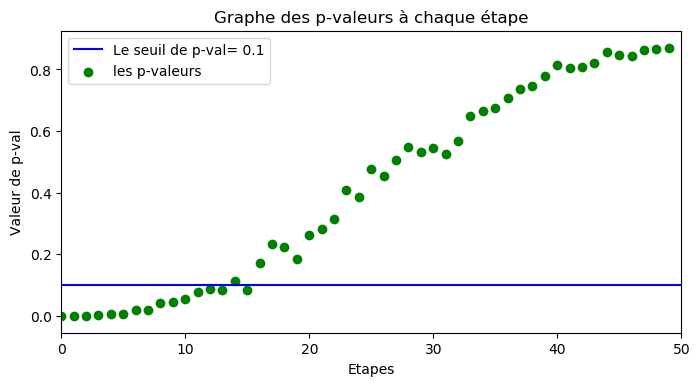

In [19]:
%matplotlib inline
print(len(select_p_val[0:50]))
plt.figure(figsize=(8,4), dpi=100) #10 unites dans un sens, 4 dans l'autre
plt.scatter(range(50),select_p_val[0:50],color="green",label="les p-valeurs")        
plt.axis(xmin = 0,xmax = 50) # graphes des 50 premières valeurs
plt.plot([0,50],[.1,.1],color = "blue",label="Le seuil de p-val= 0.1" )
plt.title("Graphe des p-valeurs à chaque étape")
plt.xlabel("Etapes")
plt.ylabel("Valeur de p-val")
plt.legend(loc='upper left')

plt.show()

In [20]:
###### afficher les variables séléctionnées avec le critère d'arret ###
print(f"les variables selectionnées après la forward selection (sans intercept) et  avec un critère d'arret  pval= 0.1 sont :\n%s" %["var"+str(i+1) for i in select_variables_stop])


les variables selectionnées après la forward selection (sans intercept) et  avec un critère d'arret  pval= 0.1 sont :
['var59', 'var124', 'var134', 'var14', 'var81', 'var168', 'var130', 'var46', 'var48', 'var177', 'var136', 'var156', 'var42']


## Question 10 ##
Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon test et le comparer à ceux de OLS et PCA before OLS.

In [21]:
## regression après pca
# On enregistre les indices des meileures variables sans l'intercept
var_stop=["var"+str(i+1) for i in select_variables_stop]
X_train_forward = train[var_stop]
X_test_forward = test[var_stop]

# On lance la régression avec les meilleures variables + l'intercept
skl_lm_forward_ols = linear_model.LinearRegression(fit_intercept=True)
skl_lm_forward_ols.fit(X_train_forward , train['y'])

# on calcul le score etle risque de prédiction
forward_ols_score = skl_lm_forward_ols.score(X_test_forward , test['y'])
r_forward_ols=test['y']-skl_lm_forward_ols.predict(X_test_forward )
risk_prediction_forward_ols= np.dot(r_forward_ols,np.transpose(r_forward_ols))/len(r_forward_ols)

##################### affichage des résultats ###############
print("#########  coefficient de determination sur le test ######")
print ("Le coefficient de determination de l'OLS classique est %.4f"%coef_determination_ols_classique)
print ("Le coefficient de determination de l'OLS après ACP est %.4f"%coef_determination_ols_pca)
print ("Le coefficient de determination de l'OLS après forward selection est %.4f"%forward_ols_score)
print("                                                          ")
print("#########     risque de présdiction sur le test     ######")
print ("Le risque de prédiction de OLS classique est %.4f"%risk_prediction_sanspca)
print ("Le risque de prédiction de OLS après ACP est %.4f"%risk_prediction_pca)
print ("Le risque de prédiction de OLS après forward selection est %.4f"%risk_prediction_forward_ols)



#########  coefficient de determination sur le test ######
Le coefficient de determination de l'OLS classique est 0.2958
Le coefficient de determination de l'OLS après ACP est 0.3634
Le coefficient de determination de l'OLS après forward selection est 0.3592
                                                          
#########     risque de présdiction sur le test     ######
Le risque de prédiction de OLS classique est 4990.9094
Le risque de prédiction de OLS après ACP est 4512.4039
Le risque de prédiction de OLS après forward selection est 4541.8538


On remarque que les deux techniques de selection de variables ont amélioré la modélisation en terme de coefficient de determination 
et risque de prédiction . La méthode de OLS après forward selection est plus efficace que l'OLS après ACP  pour notre jeux de données.

## Question 11
Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [22]:

########## Un processus itératif de train / test : on divise le dataframe intial en test et train ,
########## puis on split le train obtenu ...
########## on pourra utiliser la fonction Kfold de Scikit-learn qui permet une répartition homogène de la taille des folds

rest1, fold1 = train_test_split(train, test_size=0.25)
rest2, fold2 = train_test_split(rest1, test_size=0.3)
fold4, fold3 = train_test_split(rest2, test_size=0.5)
print("La taille de fold 1 est %s " %fold1.shape[0])
print("La taille de fold 2 est %s " %fold2.shape[0])
print("La taille de fold 3 est %s " %fold3.shape[0])
print("La taille de fold 4 est %s " %fold4.shape[0])

 
################## les indices ###############
print("\n Les index de fold 1 sont %s \n" %fold1.index)
print("\n Les index de fold 2 sont %s \n" %fold2.index)
print("\n Les index de fold 3 sont %s \n" %fold3.index)
print("\n Les index de fold 4 sont %s \n" %fold4.index)


La taille de fold 1 est 89 
La taille de fold 2 est 80 
La taille de fold 3 est 92 
La taille de fold 4 est 92 

 Les index de fold 1 sont Int64Index([ 46, 429, 411, 199, 399,  59, 145,  48, 202, 122, 166, 398, 229,
             81, 412, 366, 153,   9,   8,  41, 263, 238, 101, 175, 178, 360,
             32, 187,  88, 319, 397, 373, 180, 328, 257, 426, 352, 417, 385,
            200, 439, 382, 435, 109, 400, 432, 146,  76,  69, 333, 356,  77,
             83, 290,  96, 142, 427, 295,  89, 325, 350,  95, 215, 244,  66,
             11,  84, 389, 129, 434, 294,  30,  28, 340, 164,  57, 128, 234,
            372, 239, 226, 169, 316,  54, 418,  43, 322, 410, 344],
           dtype='int64') 


 Les index de fold 2 sont Int64Index([147, 173, 300,  90, 227, 155, 339, 396, 176, 233,  25,  27, 132,
            258, 368, 149, 259, 440, 136, 425, 172, 287, 103,  92, 255, 106,
             67, 183, 193, 384,  21, 275, 248, 261, 246, 253, 219, 288,  19,
            332, 383, 348,   4, 318, 192, 148

## Question 12
Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur du risque sur le test.

In [23]:
from sklearn.linear_model import Ridge
listevariable=list(map(lambda x:"var"+str(x),list(range(1,211))))

############ une fonction qui fit le ridge pour un alpha donnée et renvoie le risque quadratique
def ridge_regression(train,test, alpha):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(train[listevariable],train['y'])
    r=test['y']-ridgereg.predict(test[listevariable])
    #ridgereg.score(test[listevariable],test['y'])
    return np.dot(r,np.transpose(r))/len(r)

In [24]:


########### une fonction qui renvoie la moyenne des erreurs de la cross-validation
def ridge_cv(listfold,alpha):
    listerreur=[]
    for f in list(listfold.keys()) :
        test=listfold[f]
        train=pd.DataFrame()
        for rest in list(listfold.keys()) :
            if rest !=f:
                train=pd.concat([train,listfold[rest]])
        listerreur.append(ridge_regression(train,test,alpha))
    return sum(listerreur) / float(len(listerreur))
    
#ridge_regression(fold1,fold2,0.2)

In [25]:
######### on stocke les folds dans un dictionnaire
listfold={'fold1':fold1,'fold2':fold2,'fold3':fold3,'fold4':fold4}
prediction_risk_alpha={}## un dictionnaire qui contiendra le risque de chaque alpha

####### on prend un grid intial assez étendu pour le choix de alpha 
alphagrid=[0,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.11,0.12,0.13,.14,0.16,0.18,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.3,1.4,1.5,2,2.5,3,3.5,
          10,15,20,25,30,40,50,60,75,100,150,200,250,500,1000,1200,1300,1500,2000,10000]

listerr=[] ## une liste qui contiendra les erreurs
alphamin=0 ## juste une initialisaton de alpha
errormin=10000000 ## intialement , l'erreur min est très grand
for alpha in alphagrid :
    err=ridge_cv(listfold,alpha)
    print('alpha: {:2} | mean_cv_error: {}'.
          format(alpha,round(err,3)))
    if ( err < errormin) :
        alphamin=alpha
        errormin=err
    listerr.append(err)


alpha:  0 | mean_cv_error: 13505.602
alpha: 0.001 | mean_cv_error: 3400.449
alpha: 0.002 | mean_cv_error: 3400.415
alpha: 0.005 | mean_cv_error: 3400.314
alpha: 0.01 | mean_cv_error: 3400.147
alpha: 0.02 | mean_cv_error: 3399.817
alpha: 0.05 | mean_cv_error: 3398.866
alpha: 0.1 | mean_cv_error: 3397.4
alpha: 0.11 | mean_cv_error: 3397.124
alpha: 0.12 | mean_cv_error: 3396.852
alpha: 0.13 | mean_cv_error: 3396.585
alpha: 0.14 | mean_cv_error: 3396.323
alpha: 0.16 | mean_cv_error: 3395.813
alpha: 0.18 | mean_cv_error: 3395.321
alpha: 0.2 | mean_cv_error: 3394.846
alpha: 0.3 | mean_cv_error: 3392.697
alpha: 0.4 | mean_cv_error: 3390.861
alpha: 0.5 | mean_cv_error: 3389.271
alpha: 0.6 | mean_cv_error: 3387.875
alpha: 0.7 | mean_cv_error: 3386.634
alpha: 0.8 | mean_cv_error: 3385.518
alpha: 0.9 | mean_cv_error: 3384.504
alpha:  1 | mean_cv_error: 3383.572
alpha: 1.2 | mean_cv_error: 3381.901
alpha: 1.3 | mean_cv_error: 3381.141
alpha: 1.4 | mean_cv_error: 3380.419
alpha: 1.5 | mean_cv_error

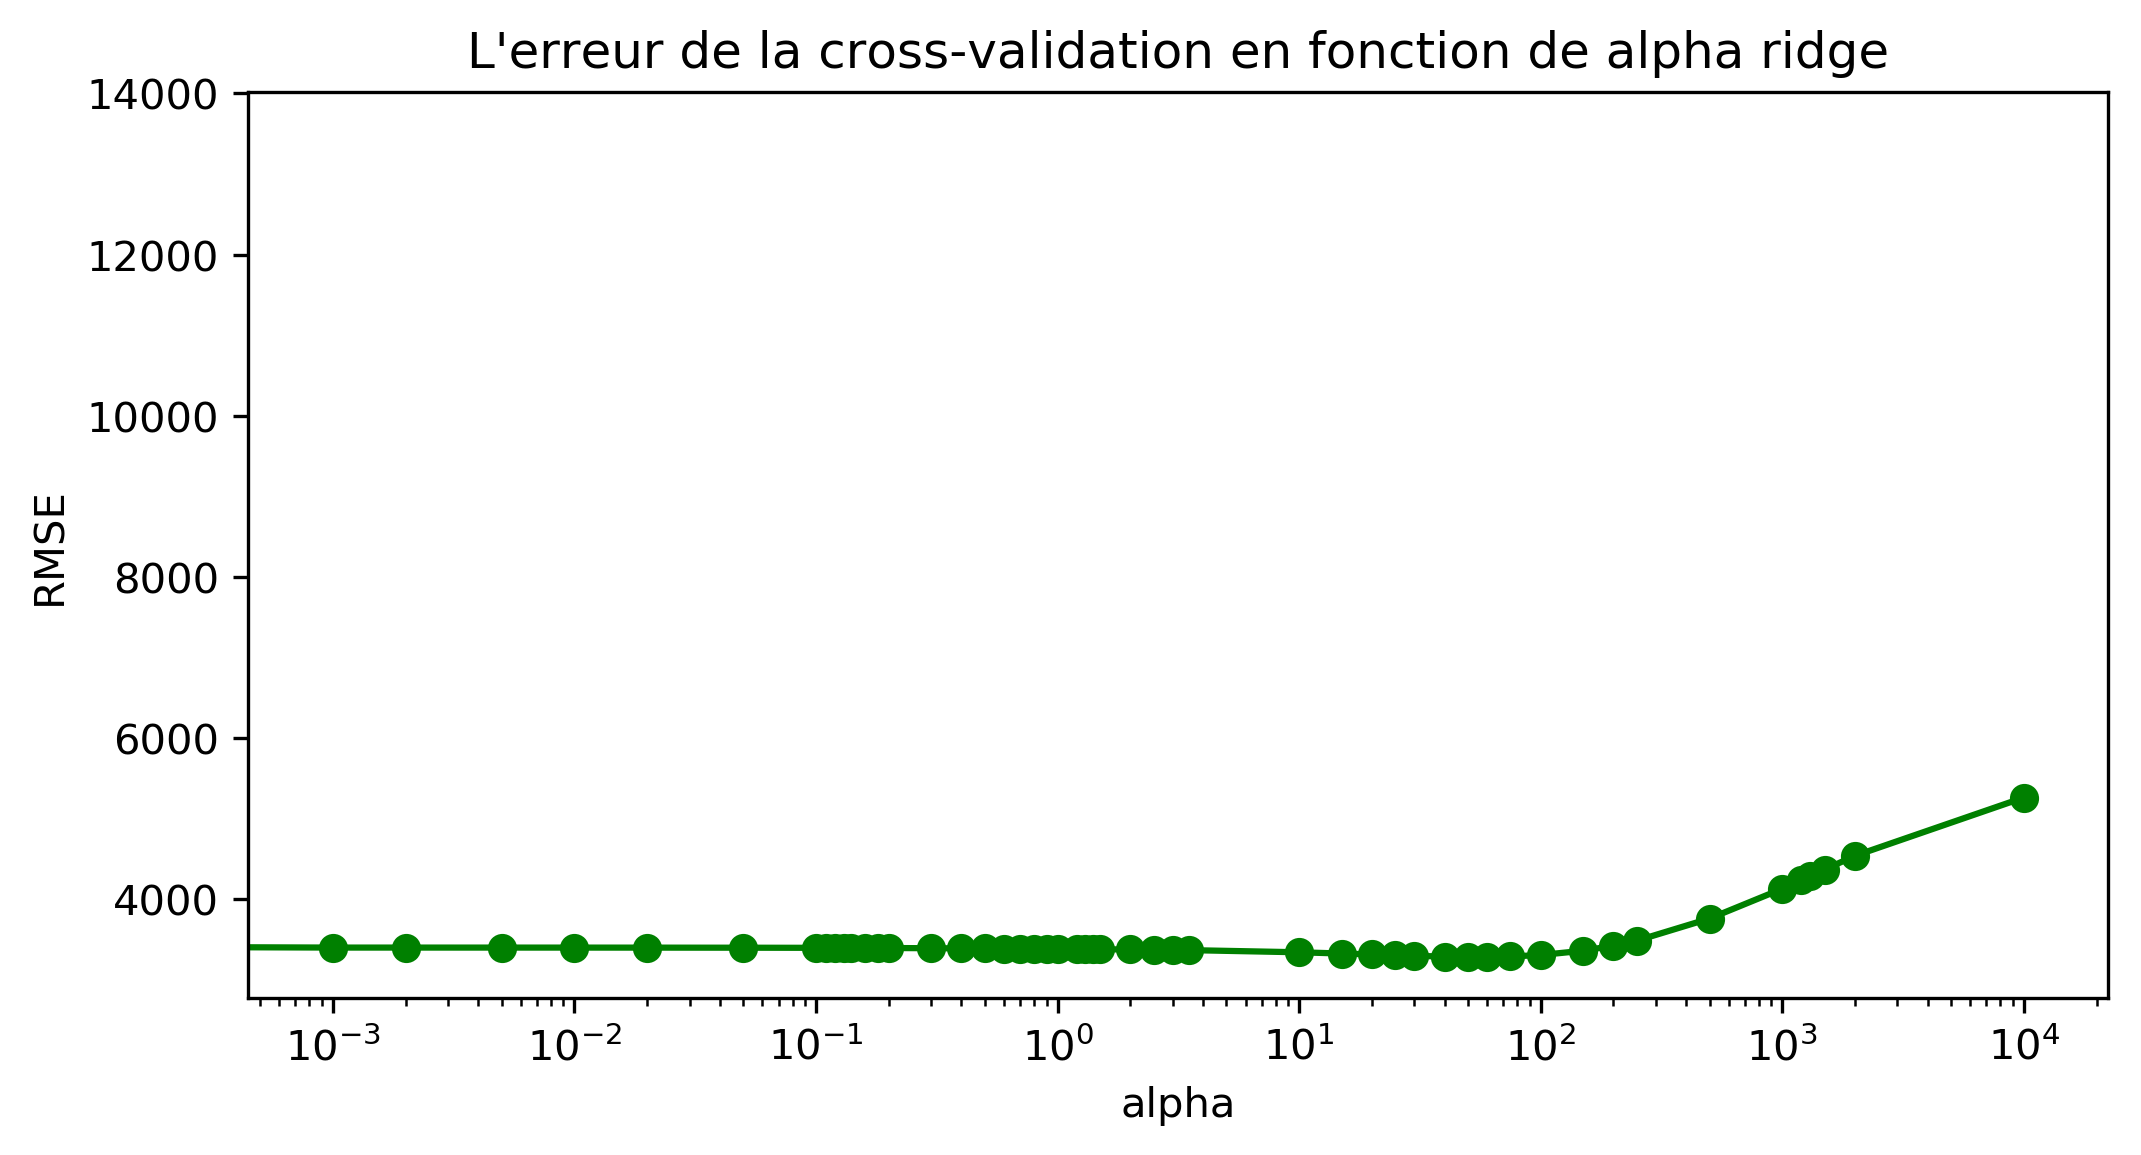


################################### Résultat ###################################### 

La meilleure valeur de alpha est 60.0 , elle correspond à une erreur de cross-validation = 3284.960 

 #########     Rappel sur le risque de prédiction des autres modèles     ######
Le risque de prédiction de OLS classique est 4990.9094
Le risque de prédiction de OLS après ACP est 4512.4039
Le risque de prédiction de OLS après forward selection est 4541.8538


In [26]:
%matplotlib notebook 
%matplotlib inline 
plt.figure(figsize=(8,4), dpi=300) #10 unites dans un sens, 4 dans l'autre

plt.title("L'erreur de la cross-validation en fonction de alpha ridge")
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.xscale('log')

plt.plot(alphagrid,listerr,'-og')
plt.show()


print("\n################################### Résultat ###################################### \n")
print ("La meilleure valeur de alpha est %.1f , elle correspond à une erreur de cross-validation = %.3f " %(alphamin,errormin))

print("\n #########     Rappel sur le risque de prédiction des autres modèles     ######")
print ("Le risque de prédiction de OLS classique est %.4f"%risk_prediction_sanspca)
print ("Le risque de prédiction de OLS après ACP est %.4f"%risk_prediction_pca)
print ("Le risque de prédiction de OLS après forward selection est %.4f"%risk_prediction_forward_ols)



On constate que la méthode Ridge donne ici un résultat comparable au niveau du risque à celui de la méthode ACP avant OLS.Le modèle OLS après forward selection demeure légèrement meilleur .



## Question 13 

A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner le risque de prédiction associé.

In [27]:
from sklearn.linear_model import Lasso
import sklearn.cross_validation as cv
from sklearn import linear_model
listevariable=list(map(lambda x:"var"+str(x),list(range(1,211))))

lassocv = linear_model.LassoCV()
lassocv.fit(train[listevariable], train['y'])
lassocv_score = lassocv.score(test[listevariable], test['y'])
lassocv_alpha = lassocv.alpha_
r_lasso=test['y']-lassocv.predict(test[listevariable])

    #ridgereg.score(test[listevariable],test['y'])
risk_prediction_lasso= np.dot(r_lasso,np.transpose(r_lasso))/len(r_lasso)
print("Lassocv alpha %.5f"%lassocv_alpha)
print("Lasssocv coef determination %.5f" %lassocv_score)
print("Lasssocv risque de prédiction %.5f" %risk_prediction_lasso)
coef_lasso=["var%s" %(i+1) for i,val in enumerate(lassocv.coef_) if val!=0]
print("liste des %s coefficients de lasso : \n"%len(coef_lasso))
print(coef_lasso)


print("\n\n\n#########    Récapitulatif des risques de prédiction sur le test     ######\n")
print ("Le risque de prédiction de OLS classique est %.4f"%risk_prediction_sanspca)
print ("Le risque de prédiction de OLS après ACP est %.4f"%risk_prediction_pca)
print ("Le risque de prédiction de OLS après forward selection est %.4f"%risk_prediction_forward_ols)
print ("Le risque de prédiction de Ridge après cross-validation est %.4f " %(errormin))
print (" Le risque de prédiction de Lasssocv est %.4f" %risk_prediction_lasso)



/home/user/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Lassocv alpha 4.86291
Lasssocv coef determination 0.42296
Lasssocv risque de prédiction 4089.93861
liste des 15 coefficients de lasso : 

['var14', 'var40', 'var42', 'var48', 'var59', 'var81', 'var82', 'var124', 'var130', 'var136', 'var160', 'var168', 'var175', 'var177', 'var186']



#########    Récapitulatif des risques de prédiction sur le test     ######

Le risque de prédiction de OLS classique est 4990.9094
Le risque de prédiction de OLS après ACP est 4512.4039
Le risque de prédiction de OLS après forward selection est 4541.8538
Le risque de prédiction de Ridge après cross-validation est 3284.9602 
 Le risque de prédiction de Lasssocv est 4089.9386


Ces résultats montrent que la méthode LassoCV semble être la plus efficace jusqu'à maintenant avec le risque de prédiction le plus faible.

## Question 14
Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux variables sélectionnées. Cette méthode est appelé Least-square LASSO.

In [28]:
listevariable=list(map(lambda x:"var"+str(x),list(range(1,211))))
skl_lm_ols_lasso = linear_model.LinearRegression(fit_intercept=True)
skl_lm_ols_lasso.fit(train[coef_lasso], train['y'])
ols_lasso_score = skl_lm_ols_lasso.score(test[coef_lasso], test['y'])
r_ols_lasso=test['y']-skl_lm_ols_lasso.predict(test[coef_lasso])
risk_prediction_ols_lasso= np.dot(r_ols_lasso,np.transpose(r_ols_lasso))/len(r_ols_lasso)
print("Le coefficient de détermination de Least Square Lasso = %.5f" %ols_lasso_score)
print("Risque de prédiction  Lest Square Lasso = %.5f" %risk_prediction_ols_lasso)



print("\n\n\n#########    Récapitulatif des risques de prédiction sur le test     ######\n")
print ("Le risque de prédiction de OLS classique est %.4f"%risk_prediction_sanspca)
print ("Le risque de prédiction de OLS après ACP est %.4f"%risk_prediction_pca)
print ("Le risque de prédiction de OLS après forward selection est %.4f"%risk_prediction_forward_ols)
print ("Le risque de prédiction de Ridge après cross-validation est %.4f " %(errormin))
print ("Le risque de prédiction de Lasssocv est %.4f" %risk_prediction_lasso)
print ("Le risque de prédiction  Lest Square Lasso = %.4f" %risk_prediction_ols_lasso)



Le coefficient de détermination de Least Square Lasso = 0.39235
Risque de prédiction  Lest Square Lasso = 4306.92452



#########    Récapitulatif des risques de prédiction sur le test     ######

Le risque de prédiction de OLS classique est 4990.9094
Le risque de prédiction de OLS après ACP est 4512.4039
Le risque de prédiction de OLS après forward selection est 4541.8538
Le risque de prédiction de Ridge après cross-validation est 3284.9602 
Le risque de prédiction de Lasssocv est 4089.9386
Le risque de prédiction  Lest Square Lasso = 4306.9245


La méthode Least Square Lasso donne une performance semblable à celle obtenue avec OLS après ACP

# QUESTION 15

Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances moindres par rapport à OLS peuvent se produire. Commenter.

#### 1. Premier Essai ####

On va essayer le modèle d'arbre de décision qui n'est pas linéaire , on fera la crossvalidation sur le paramètre maxdepth.

In [29]:
from sklearn.tree import DecisionTreeRegressor  

def decisiontree_regression_rmse(train,test, alpha):
    #Fit the model
    regressor_dt=DecisionTreeRegressor(max_depth=alpha,splitter='best') 
    regressor_dt.fit(train[coef_lasso],train['y'])
    r=test['y']-regressor_dt.predict(test[coef_lasso])
    #ridgereg.score(test[listevariable],test['y'])
    return np.dot(r,np.transpose(r))/len(r)




listfold={'fold1':fold1,'fold2':fold2,'fold3':fold3,'fold4':fold4}
prediction_risk_alpha={}

def decisiontree_cv(listfold,maxdepth):
    listerreur=[]
    for f in list(listfold.keys()) :
        test=listfold[f]
        train=pd.DataFrame()
        for rest in list(listfold.keys()) :
            if rest !=f:
                train=pd.concat([train,listfold[rest]])
        listerreur.append(decisiontree_regression_rmse(train,test,alpha))
    return sum(listerreur) / float(len(listerreur))
    
#ridge_regression(fold1,fold2,0.2)


############### determination du meilleur paramètre #############
depthgrid=range(1,100)

listerr=[]
depthmin=0
errormin=10000000
for depth in depthgrid :
    err=decisiontree_cv(listfold,depth)
    print('max_depth: {:1} | mean_cv_error: {}'.
          format(depth,round(err,3)))
    if ( err < errormin) :
        depthmin=depth
        errormin=err
    listerr.append(err)

    
print ("La meilleure valeur de depth est %.1f , elle correspond à une erreur de cross-validation = %.3f " %(depthmin,errormin))

############### refaire tourner le modèle avec le eilleur paramètre ###########

regressor_dt = DecisionTreeRegressor(max_depth=depthmin,splitter='best',random_state=0)  
regressor_dt.fit(train[coef_lasso], train['y']) 
r_dtree=test['y']-regressor_dt.predict(test[coef_lasso])
risk_prediction_dtree= np.dot(r_dtree,np.transpose(r_dtree))/len(r_dtree)
print("Le risque de prédiction de l'arbre de décision est %.4f" %risk_prediction_dtree)

max_depth: 1 | mean_cv_error: 6046.148
max_depth: 2 | mean_cv_error: 5697.817
max_depth: 3 | mean_cv_error: 5847.433
max_depth: 4 | mean_cv_error: 5940.878
max_depth: 5 | mean_cv_error: 5831.66
max_depth: 6 | mean_cv_error: 5819.717
max_depth: 7 | mean_cv_error: 5849.947
max_depth: 8 | mean_cv_error: 5779.088
max_depth: 9 | mean_cv_error: 6021.905
max_depth: 10 | mean_cv_error: 5787.107
max_depth: 11 | mean_cv_error: 5687.953
max_depth: 12 | mean_cv_error: 5861.131
max_depth: 13 | mean_cv_error: 5693.953
max_depth: 14 | mean_cv_error: 5668.271
max_depth: 15 | mean_cv_error: 5809.44
max_depth: 16 | mean_cv_error: 6055.675
max_depth: 17 | mean_cv_error: 5920.558
max_depth: 18 | mean_cv_error: 5925.326
max_depth: 19 | mean_cv_error: 6033.203
max_depth: 20 | mean_cv_error: 6174.559
max_depth: 21 | mean_cv_error: 5470.833
max_depth: 22 | mean_cv_error: 6107.907
max_depth: 23 | mean_cv_error: 5836.478
max_depth: 24 | mean_cv_error: 5917.438
max_depth: 25 | mean_cv_error: 5846.491
max_depth: 

Le modèle d'arbre de décision ne marche pas aussi bien sur notre jeux de données et il y a des modèles linéaires testés dans ce TP qui sont relativement plus robuste.Une autre approche consiste à utiliser les forets aléatoires qui permettent de mieux valider la selection des features et les paramètres du modèle

#### 2. Deuxième Essai ####

On va essayer le modèle Support vector machine qui n'est pas linéaire .On fera la crossvalidation sur le paramètre gamma 

In [30]:
from sklearn.svm import SVR

def svr_regression_rmse(train,test, gamma):
    #Fit the model
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=gamma)
    svr_rbf .fit(train[coef_lasso],train['y'])
    r=test['y']-svr_rbf .predict(test[coef_lasso])
    #ridgereg.score(test[listevariable],test['y'])
    return np.dot(r,np.transpose(r))/len(r)




listfold={'fold1':fold1,'fold2':fold2,'fold3':fold3,'fold4':fold4}
prediction_risk_alpha={}

def decisiontree_cv(listfold,gamma):
    listerreur=[]
    for f in list(listfold.keys()) :
        test=listfold[f]
        train=pd.DataFrame()
        for rest in list(listfold.keys()) :
            if rest !=f:
                train=pd.concat([train,listfold[rest]])
        listerreur.append(decisiontree_regression_rmse(train,test,gamma))
    return sum(listerreur) / float(len(listerreur))
    
#ridge_regression(fold1,fold2,0.2)


############### determination du meilleur paramètre #############
gammagrid=[0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7,0.8,1]

listerr=[]
gammamin=0
errormin=10000000
for gamma in gammagrid :
    err=decisiontree_cv(listfold,gamma)
    print('gamma: {:1} | mean_cv_error: {}'.
          format(gamma,round(err,3)))
    if ( err < errormin) :
        gammamin=gamma
        errormin=err
    listerr.append(err)

    
print ("La meilleure valeur de gamma est %.1f , elle correspond à une erreur de cross-validation = %.3f " %(gammamin,errormin))

############### refaire tourner le modèle avec le eilleur paramètre ###########

regressor_svr = SVR(kernel='rbf', C=1e3, gamma=gammamin)
regressor_svr.fit(train[coef_lasso], train['y']) 
r_svr=test['y']-regressor_svr.predict(test[coef_lasso])
risk_prediction_svr =np.dot(r_svr,np.transpose(r_svr))/len(r_svr)
print("Le risque de prédiction de Support vector regression est %.4f" %risk_prediction_svr)

gamma: 0.01 | mean_cv_error: 5591.539
gamma: 0.02 | mean_cv_error: 5591.539
gamma: 0.05 | mean_cv_error: 5591.539
gamma: 0.1 | mean_cv_error: 5591.539
gamma: 0.2 | mean_cv_error: 5591.539
gamma: 0.3 | mean_cv_error: 5591.539
gamma: 0.5 | mean_cv_error: 5591.539
gamma: 0.7 | mean_cv_error: 5591.539
gamma: 0.8 | mean_cv_error: 5591.539
gamma: 1 | mean_cv_error: 4146.857
La meilleure valeur de gamma est 1.0 , elle correspond à une erreur de cross-validation = 4146.857 
Le risque de prédiction de Support vector regression est 7167.6164


Meme le modèle de support vector regression ne marche pas bien sur notre jeux de données . A priori , il faut améliorer le tuning du modèle en faisant un GridSearch sur les autres paramètres ( "C", le kernel .. )